In [1]:
from wann_genetic.tools import load_series_stats, mean_comparison, ExperimentSeries
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [3]:
data_dir = "../data/iris_edge_signs"

In [4]:
df = load_series_stats(data_dir)
df['exp'] = df.agg('{0[distribution/_name]}, {0[seed]}'.format, axis=1)
df.index = df['exp']
x_col = "edge_signs_enabled"
x_label = "Edge signs enabled"

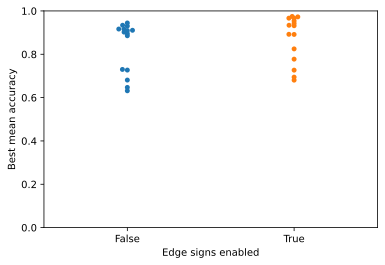

In [5]:
sns.swarmplot(x=x_col, y="mean accuracy", data=df)
plt.xlabel(x_label)
plt.ylabel('Best mean accuracy')
plt.ylim([0,1])
plt.show()

In [6]:
a = df[df[x_col]]['mean accuracy']
b = df[~df[x_col]]['mean accuracy']
pd.DataFrame({'enabled': a, 'not enabled': b, 'diff': a-b})

,enabled,not enabled,diff
exp,,,
"uniform -2,2, 0",0.680600,0.647067,0.033533
"uniform -2,2, 1",0.777533,0.727133,0.050400
"uniform -2,2, 2",0.694533,0.681000,0.013533
"uniform -2,2, 3",0.942733,0.631467,0.311267
"uniform -2,2, 4",0.726800,0.730067,-0.003267
"uniform 1,5, 0",0.954133,0.885467,0.068667
"uniform 1,5, 1",0.891600,0.902333,-0.010733
"uniform 1,5, 2",0.974667,0.909333,0.065333
"uniform 1,5, 3",0.824867,0.930267,-0.105400


In [7]:
print(f'mean with edges signs: {a.mean()}, without: {b.mean()}')
t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

mean with edges signs: 0.8754399999999999, without: 0.8374355555555554
0.9337646170750848 0.3584687847297625


In [8]:
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()

data = list()

for i, c in enumerate(series.configurations()):
    env = series.configuration_env(c)
    
    ind_stats = dict()   
    
    with env.open_data():
        env.load_hof()
    
    for ind in env.hall_of_fame:
        ind.express()
        
        for k, v in ind.metadata().items():
            if k not in ind_stats:
                ind_stats[k] = list()
                
            ind_stats[k].append(v)
    
    stats = dict()
    for prefix, func in [('max', np.max), ('min', np.min), ('std', np.std), ('mean', np.mean)]:
        for k, v in ind_stats.items():
            if not np.any([vi is None for vi in v]):
                stats[f'{prefix}.{k}'] = func(v)
    
    stats.update(series.flat_values(c))
    stats['_configuration'] = c
    data.append(stats)
    
df = pd.DataFrame(data=data)
df['exp'] = df.agg('{0[distribution/_name]}, {0[seed]}'.format, axis=1)
df.index = df['exp']

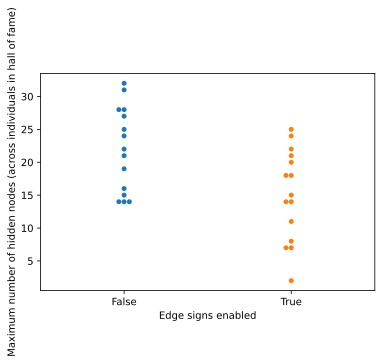

In [9]:
sns.swarmplot(x=x_col, y="max.n_hidden", data=df)
plt.xlabel(x_label)
plt.ylabel('Maximum number of hidden nodes (across individuals in hall of fame)')
plt.show()

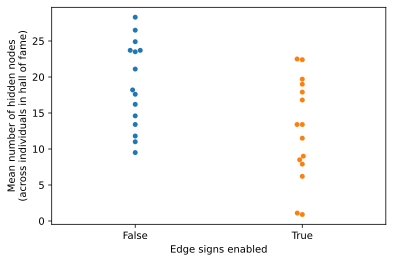

In [12]:
sns.swarmplot(x=x_col, y="mean.n_hidden", data=df)
plt.xlabel(x_label)
plt.ylabel('Mean number of hidden nodes\n(across individuals in hall of fame)')
plt.show()

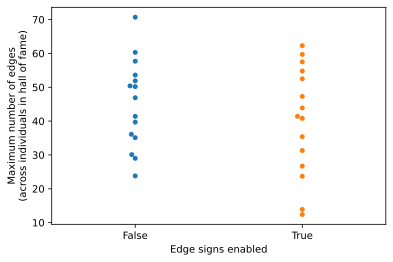

In [13]:
sns.swarmplot(x=x_col, y="mean.n_enabled_edges", data=df)
plt.xlabel(x_label)
plt.ylabel('Maximum number of edges\n(across individuals in hall of fame)')
plt.show()

In [20]:
seperating_key = x_col
comparsion_key = 'mean.n_hidden'

a = df[df[seperating_key]][comparsion_key]
b = df[~df[seperating_key]][comparsion_key]
print(a.mean(), b.mean())
print(a.median(), b.median())
t, p = ttest_ind(a, b, equal_var=False)
print (t, p)
print(a, b)

12.68 18.933333333333334
13.4 18.2
-2.6061186667212684 0.014639015843219468
exp
uniform -2,2, 0       13.4
uniform -2,2, 1       16.8
uniform -2,2, 2        8.5
uniform -2,2, 3        0.9
uniform -2,2, 4       13.4
uniform 1,5, 0        19.0
uniform 1,5, 1        11.5
uniform 1,5, 2         1.1
uniform 1,5, 3        19.7
uniform 1,5, 4        17.9
lognormal 0,0.5, 0    22.5
lognormal 0,0.5, 1     6.2
lognormal 0,0.5, 2     7.9
lognormal 0,0.5, 3     9.0
lognormal 0,0.5, 4    22.4
Name: mean.n_hidden, dtype: float64 exp
uniform -2,2, 0        9.5
uniform -2,2, 1       23.7
uniform -2,2, 2       11.8
uniform -2,2, 3       24.9
uniform -2,2, 4       23.5
uniform 1,5, 0        26.5
uniform 1,5, 1        18.2
uniform 1,5, 2        11.0
uniform 1,5, 3        21.1
uniform 1,5, 4        17.6
lognormal 0,0.5, 0    14.6
lognormal 0,0.5, 1    13.4
lognormal 0,0.5, 2    16.2
lognormal 0,0.5, 3    23.7
lognormal 0,0.5, 4    28.3
Name: mean.n_hidden, dtype: float64


In [16]:
seperating_key = x_col
comparsion_key = 'mean.n_enabled_edges'

a = df[df[seperating_key]][comparsion_key]
b = df[~df[seperating_key]][comparsion_key]
print(a.mean(), b.mean())
t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

40.24000000000001 45.126666666666665
-0.9140375646980518 0.3688298346537804


In [21]:
print(series.hyperparam_table(tablefmt='grid'))

+----------------------------------------------------+--------------------------------------+
| Parameter                                          | Value                                |
+====================================================+======================================+
| Population size                                    | 100                                  |
+----------------------------------------------------+--------------------------------------+
| Number of generations                              | 200                                  |
+----------------------------------------------------+--------------------------------------+
| Initial population                                 | fully connected                      |
|                                                    | (edges have 25% chance of            |
|                                                    | being enabled)                       |
+----------------------------------------------------+------